# BME-Crete Master Thesis (Results analysis)
### by **Stylianos Zafeiris**

### Imports and necessary variable declarations

In [2]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

Useful functions

In [3]:
def printMaxScore(scoreName, dataset):
    bestScore = dataset.loc[dataset[scoreName].idxmax()]
    print(f"{'='*11} Max {scoreName} {'='*11}\n{bestScore}\n")

#### Make sure that all results are extracted

In [4]:
! python .\extract_results.py

fat 77
muscle 76
n4 73
n4_norm 77
original 73
original_norm 74


c:\Users\szafeiris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\szafeiris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\szafeiris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\szafeir

#### Declare datasets' results paths and load them

Read datasets and load them. Then merge them into one dataframe and sort it.

In [5]:
origDatasetPath = Path('./data/results/original_results.csv')
origDataset = pd.read_csv(origDatasetPath.absolute())

origNormDatasetPath = Path('./data/results/original_norm_results.csv')
origNormDataset = pd.read_csv(origNormDatasetPath.absolute())

n4DatasetPath = Path('./data/results/n4_results.csv')
n4Dataset = pd.read_csv(n4DatasetPath.absolute())

n4NormDatasetPath = Path('./data/results/n4_norm_results.csv')
n4NormDataset = pd.read_csv(n4NormDatasetPath.absolute())

fatDatasetPath = Path('./data/results/fat_results.csv')
fatDataset = pd.read_csv(fatDatasetPath.absolute())

muscleDatasetPath = Path('./data/results/muscle_results.csv')
muscleDataset = pd.read_csv(muscleDatasetPath.absolute())


merged = pd.concat([origDataset, origNormDataset, n4Dataset, n4NormDataset, fatDataset, muscleDataset], ignore_index=True)
merged.sort_values(by=['balanced_accuracy_score', 'roc_auc_score', 'datasetName', 'featureSelectionMethodName', 'classifierName'])

# Add extra columns
merged['fullDatasetName'] = merged.apply(lambda x: f"{x['datasetName']}{'_norm' if x['isNormalized'] else ''}", axis=1)

merged['sensitivity'] = merged.apply(lambda x: x["TP"] / (x["TP"] + x["FN"]), axis=1)
merged['speficity'] = merged.apply(lambda x: x["TN"] / (x["TN"] + x["FP"]), axis=1)
merged

,featureSelectionMethodName,classifierName,datasetName,isNormalized,selectedFeaturesNo,accuracy_score,balanced_accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,cohen_kappa_score,TN,FP,FN,TP,fullDatasetName,sensitivity,speficity
0,boruta,gnb,original,False,67,0.566667,0.558644,0.493506,0.475000,0.513514,0.558644,0.115869,32,21,18,19,original,0.513514,0.603774
1,boruta,knn,original,False,79,0.600000,0.533333,0.357143,0.384615,0.333333,0.533333,0.068966,44,16,20,10,original,0.333333,0.733333
2,boruta,rf,original,False,178,0.544444,0.528571,0.438356,0.421053,0.457143,0.528571,0.056266,33,22,19,16,original,0.457143,0.600000
3,boruta,svm-linear,original,False,130,0.533333,0.509259,0.400000,0.411765,0.388889,0.509259,0.018692,34,20,22,14,original,0.388889,0.629630
4,boruta,svm-rbf,original,False,61,0.644444,0.581408,0.407407,0.550000,0.323529,0.581408,0.177143,47,9,23,11,original,0.323529,0.839286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,surf,knn,muscle,False,78,0.633333,0.587963,0.440678,0.565217,0.361111,0.587963,0.187192,44,10,23,13,muscle,0.361111,0.814815
446,surf,rf,muscle,False,8,0.544444,0.513664,0.369231,0.444444,0.315789,0.513664,0.028436,37,15,26,12,muscle,0.315789,0.711538
447,surf,svm-linear,muscle,False,28,0.588889,0.516318,0.177778,0.500000,0.108108,0.516318,0.037016,49,4,33,4,muscle,0.108108,0.924528
448,surf,svm-rbf,muscle,False,3,0.644444,0.522143,0.200000,0.444444,0.129032,0.522143,0.053254,54,5,27,4,muscle,0.129032,0.915254


Count dataset sample size

In [6]:
merged.groupby(by='fullDatasetName')['fullDatasetName'].aggregate(['count'])

,count
fullDatasetName,
fat,77
muscle,76
n4,73
n4_norm,77
original,73
original_norm,74


### Main analysis

#### Create balanced accuracy boxplots

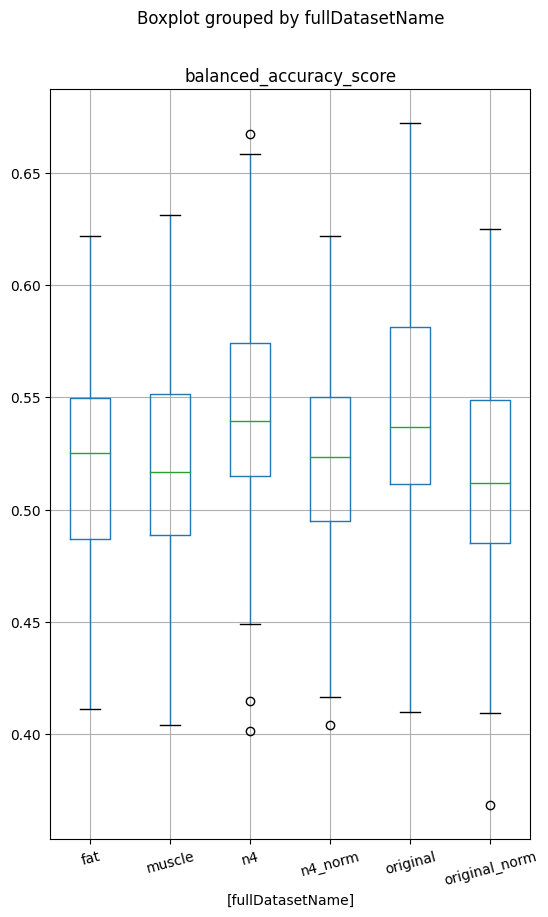

In [7]:
# Show boxplot for balanced acc
merged_bplt = merged.boxplot(
    column=[
        'balanced_accuracy_score',
    ],
    by= ['fullDatasetName'],
    rot=15, figsize=(6, 10) )
merged_bplt.plot()
plt.show()

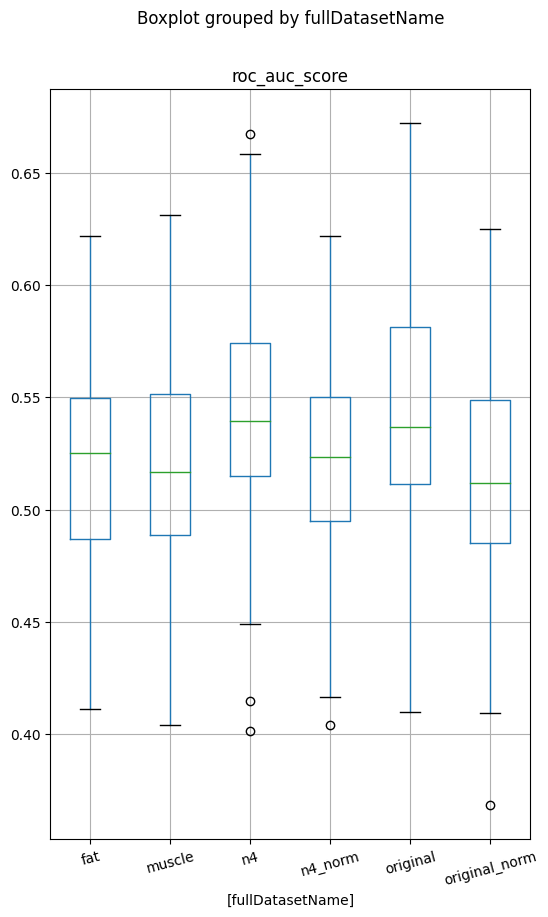

In [8]:
# Show boxplot for balanced acc
merged_bplt = merged.boxplot(
    column=[
        'roc_auc_score',
    ],
    by= ['fullDatasetName'],
    rot=15, figsize=(6, 10) )
merged_bplt.plot()
plt.show()

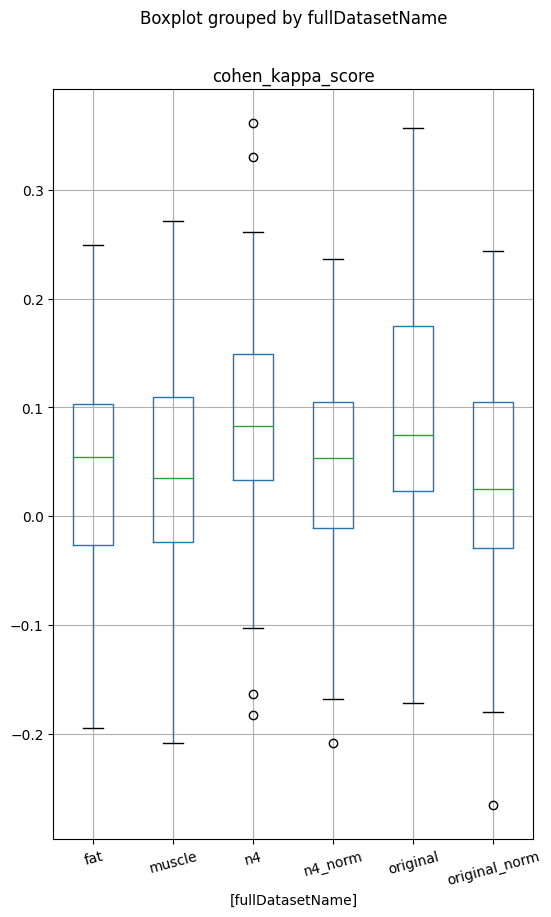

In [9]:
# Show boxplot for balanced acc
merged_bplt = merged.boxplot(
    column=[
        'cohen_kappa_score',
    ],
    by= ['fullDatasetName'],
    rot=15, figsize=(6, 10), )
merged_bplt.plot()
plt.show()

Print max scores

In [10]:
printMaxScore('balanced_accuracy_score', origDataset)


=========== Max balanced_accuracy_score ===========
featureSelectionMethodName        cmim
classifierName                     xgb
datasetName                   original
isNormalized                     False
selectedFeaturesNo                  73
accuracy_score                     0.7
balanced_accuracy_score       0.671851
f1_score                      0.584615
precision_score               0.678571
recall_score                  0.513514
roc_auc_score                 0.671851
cohen_kappa_score             0.356803
TN                                  44
FP                                   9
FN                                  18
TP                                  19
Name: 11, dtype: object



In [11]:
printMaxScore('balanced_accuracy_score', origNormDataset)

=========== Max balanced_accuracy_score ===========
featureSelectionMethodName    multisurf
classifierName                      gnb
datasetName                    original
isNormalized                       True
selectedFeaturesNo                   13
accuracy_score                 0.655556
balanced_accuracy_score           0.625
f1_score                       0.507937
precision_score                0.484848
recall_score                   0.533333
roc_auc_score                     0.625
cohen_kappa_score              0.243902
TN                                   43
FP                                   17
FN                                   14
TP                                   16
Name: 38, dtype: object



In [12]:
printMaxScore('balanced_accuracy_score', n4Dataset)

=========== Max balanced_accuracy_score ===========
featureSelectionMethodName     relieff
classifierName                     knn
datasetName                         n4
isNormalized                     False
selectedFeaturesNo                  68
accuracy_score                0.722222
balanced_accuracy_score       0.667017
f1_score                      0.545455
precision_score               0.714286
recall_score                  0.441176
roc_auc_score                 0.667017
cohen_kappa_score             0.361158
TN                                  50
FP                                   6
FN                                  19
TP                                  15
Name: 50, dtype: object



In [13]:
printMaxScore('balanced_accuracy_score', n4NormDataset)

=========== Max balanced_accuracy_score ===========
featureSelectionMethodName        mrmr
classifierName                      rf
datasetName                         n4
isNormalized                      True
selectedFeaturesNo                  23
accuracy_score                0.644444
balanced_accuracy_score       0.621651
f1_score                      0.515152
precision_score               0.485714
recall_score                  0.548387
roc_auc_score                 0.621651
cohen_kappa_score             0.236074
TN                                  41
FP                                  18
FN                                  14
TP                                  17
Name: 32, dtype: object



In [14]:
printMaxScore('balanced_accuracy_score', fatDataset)

=========== Max balanced_accuracy_score ===========
featureSelectionMethodName        mrmr
classifierName                      rf
datasetName                        fat
isNormalized                     False
selectedFeaturesNo                  23
accuracy_score                0.644444
balanced_accuracy_score       0.621651
f1_score                      0.515152
precision_score               0.485714
recall_score                  0.548387
roc_auc_score                 0.621651
cohen_kappa_score             0.236074
TN                                  41
FP                                  18
FN                                  14
TP                                  17
Name: 32, dtype: object



In [15]:
printMaxScore('balanced_accuracy_score', muscleDataset)

=========== Max balanced_accuracy_score ===========
featureSelectionMethodName    multisurf
classifierName                  svm-rbf
datasetName                      muscle
isNormalized                      False
selectedFeaturesNo                   18
accuracy_score                 0.677778
balanced_accuracy_score        0.630927
f1_score                       0.508475
precision_score                0.555556
recall_score                    0.46875
roc_auc_score                  0.630927
cohen_kappa_score              0.271357
TN                                   46
FP                                   12
FN                                   17
TP                                   15
Name: 44, dtype: object



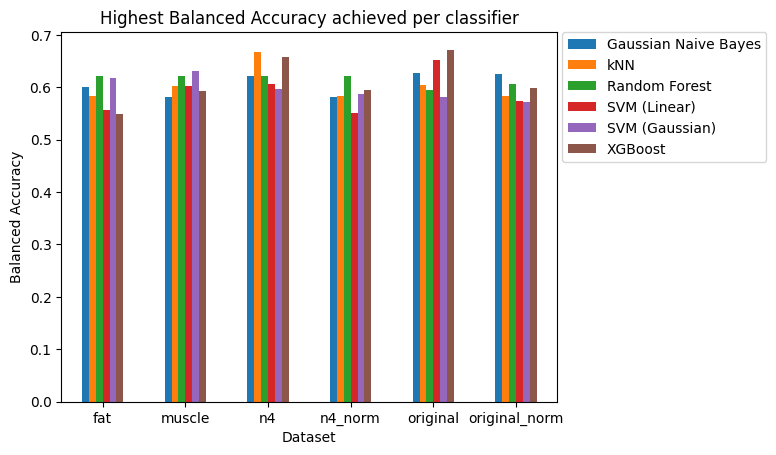

In [16]:
new_merged = merged.groupby(['fullDatasetName','classifierName'])['balanced_accuracy_score'].max().unstack().plot.bar(rot=0)

plt.xlabel('Dataset')
plt.ylabel('Balanced Accuracy')
plt.title('Highest Balanced Accuracy achieved per classifier')
plt.legend(['Gaussian Naive Bayes', 'kNN', 'Random Forest', 'SVM (Linear)', 'SVM (Gaussian)', 'XGBoost'], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show()

In [17]:
merged.groupby(['fullDatasetName','classifierName'])['balanced_accuracy_score'].max()

fullDatasetName  classifierName
fat              gnb               0.600000
                 knn               0.582866
                 rf                0.621651
                 svm-linear        0.555839
                 svm-rbf           0.616918
                 xgb               0.549595
muscle           gnb               0.581818
                 knn               0.601734
                 rf                0.621651
                 svm-linear        0.603285
                 svm-rbf           0.630927
                 xgb               0.592611
n4               gnb               0.621877
                 knn               0.667017
                 rf                0.620602
                 svm-linear        0.605276
                 svm-rbf           0.597222
                 xgb               0.658338
n4_norm          gnb               0.581818
                 knn               0.583502
                 rf                0.621651
                 svm-linear        0.550000


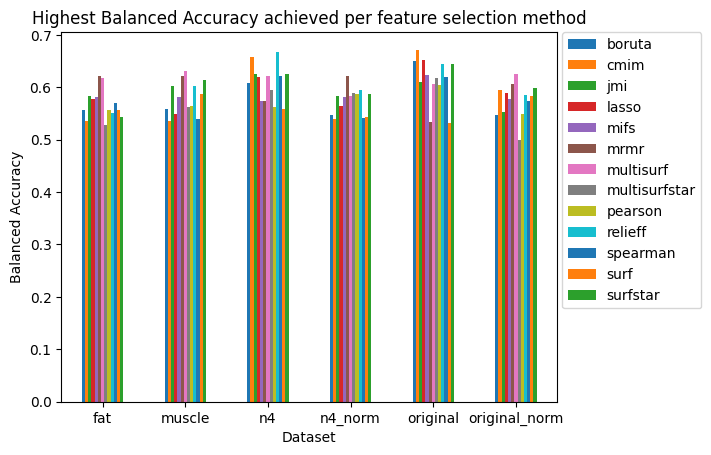

In [18]:
new_merged = merged.groupby(['fullDatasetName','featureSelectionMethodName'])['balanced_accuracy_score'].max().unstack().plot.bar(rot=0)

plt.xlabel('Dataset')
plt.ylabel('Balanced Accuracy')
plt.title('Highest Balanced Accuracy achieved per feature selection method')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.show()